In [157]:
%load_ext autoreload
%autoreload 2
from plot import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [158]:
results_path = "../../results/bloat-then-min-prune"
show=True

In [159]:

save_path = os.path.join(results_path, "plots")
os.makedirs(os.path.join(save_path), exist_ok=True)

metrics = [
    "evals_by_batch",
    "normed_fitness_by_batch",
    "pruned_cxs",
    # "offspring_by_batch",
    # "fitness_by_batch",
    "cx_by_batch",
    "nodes_by_batch",

]
results = read_tensor_results(results_path, metrics, max_runs=None)

Merging: 100%|██████████| 1684/1684 [03:52<00:00,  7.26it/s]


In [160]:
results

,batch,condition,cx_by_batch,evals_by_batch,nodes_by_batch,normed_fitness_by_batch,pruned_cxs,run,target
0,0,bloat-then-min-prune-16-0,41.0,173.0,0.0,0.384343,0.0,run_12208991900537393646,data/sunrise.png
1,1,bloat-then-min-prune-16-0,41.0,298.0,0.0,0.398768,0.0,run_12208991900537393646,data/sunrise.png
2,2,bloat-then-min-prune-16-0,41.0,401.0,0.0,0.402621,0.0,run_12208991900537393646,data/sunrise.png
3,3,bloat-then-min-prune-16-0,41.0,512.0,0.0,0.397290,0.0,run_12208991900537393646,data/sunrise.png
4,4,bloat-then-min-prune-16-0,75.0,594.0,9.0,0.409794,0.0,run_12208991900537393646,data/sunrise.png
...,...,...,...,...,...,...,...,...,...
119596,222,bloat-then-min-prune-64-16,473.0,29620.0,123.0,0.484136,16.0,run_16766440513607832046,data/apple.png
119597,223,bloat-then-min-prune-64-16,473.0,29675.0,123.0,0.484136,16.0,run_16766440513607832046,data/apple.png
119598,224,bloat-then-min-prune-64-16,473.0,29830.0,123.0,0.484136,16.0,run_16766440513607832046,data/apple.png
119599,225,bloat-then-min-prune-64-16,473.0,29916.0,123.0,0.484136,16.0,run_16766440513607832046,data/apple.png


In [161]:
print(results[results['evals_by_batch']> 49_000].run.unique())

[]


In [162]:
for target in results.target.unique():
    print(target)
    for cond in results.condition.unique():
        print("\t", cond, end='\t\t')
        # count runs with target
        print(results[(results.target==target ) & (results.condition==cond)].run.unique().shape)

data/sunrise.png
	 bloat-then-min-prune-16-0		(13,)
	 bloat-then-min-prune-64-64		(12,)
	 bloat-then-min-prune-16-16		(14,)
	 bloat-then-min-prune-64-63		(12,)
	 bloat-then-min-prune-1-0		(14,)
	 bloat-then-min-prune-64-0		(10,)
	 bloat-then-min-prune-64-16		(11,)
data/skull.png
	 bloat-then-min-prune-16-0		(13,)
	 bloat-then-min-prune-64-64		(13,)
	 bloat-then-min-prune-16-16		(14,)
	 bloat-then-min-prune-64-63		(12,)
	 bloat-then-min-prune-1-0		(14,)
	 bloat-then-min-prune-64-0		(9,)
	 bloat-then-min-prune-64-16		(13,)
data/dolphin.png
	 bloat-then-min-prune-16-0		(13,)
	 bloat-then-min-prune-64-64		(12,)
	 bloat-then-min-prune-16-16		(14,)
	 bloat-then-min-prune-64-63		(11,)
	 bloat-then-min-prune-1-0		(14,)
	 bloat-then-min-prune-64-0		(10,)
	 bloat-then-min-prune-64-16		(11,)
data/apple.png
	 bloat-then-min-prune-16-0		(4,)
	 bloat-then-min-prune-64-64		(13,)
	 bloat-then-min-prune-16-16		(14,)
	 bloat-then-min-prune-64-63		(11,)
	 bloat-then-min-prune-1-0		(15,)
	 bloat-then-min-

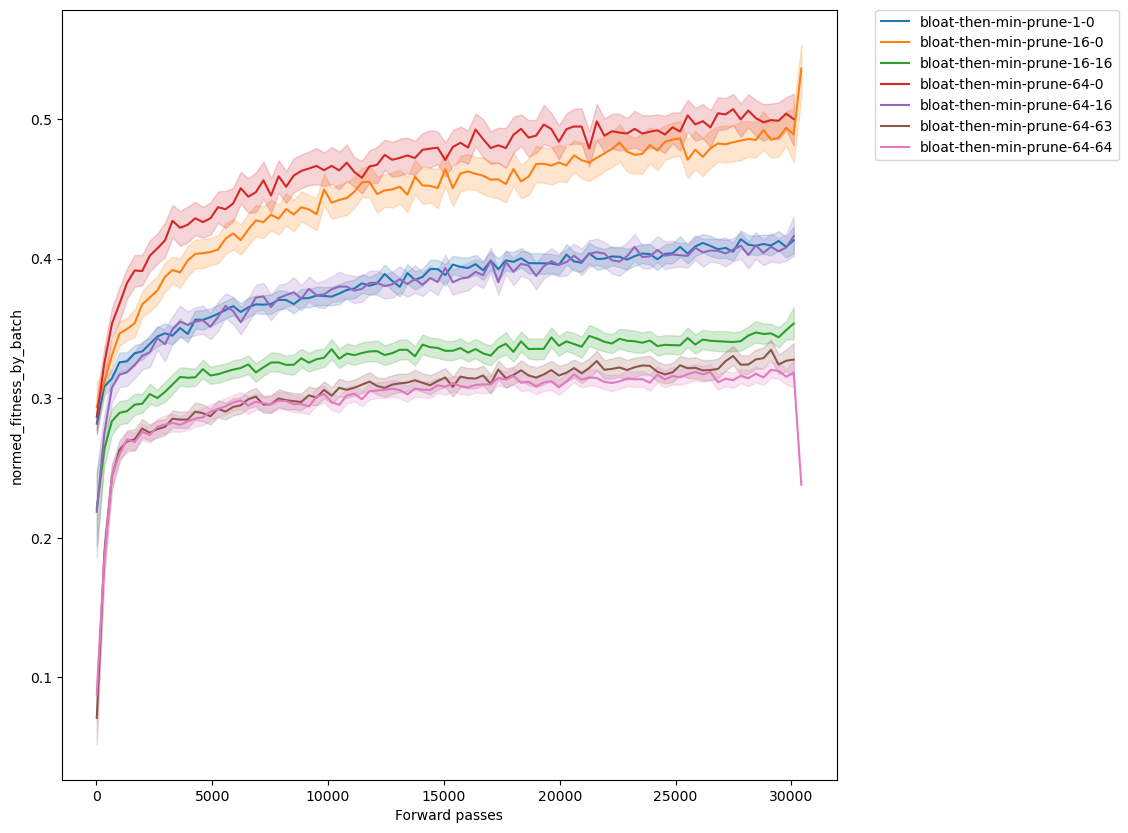

In [163]:
# plot_vs_evals(results, 'normed_fitness_by_batch', save_path, show)
plot_vs_evals(results, 'normed_fitness_by_batch', save_path, show, mean_by_target=True, smooth=.90)

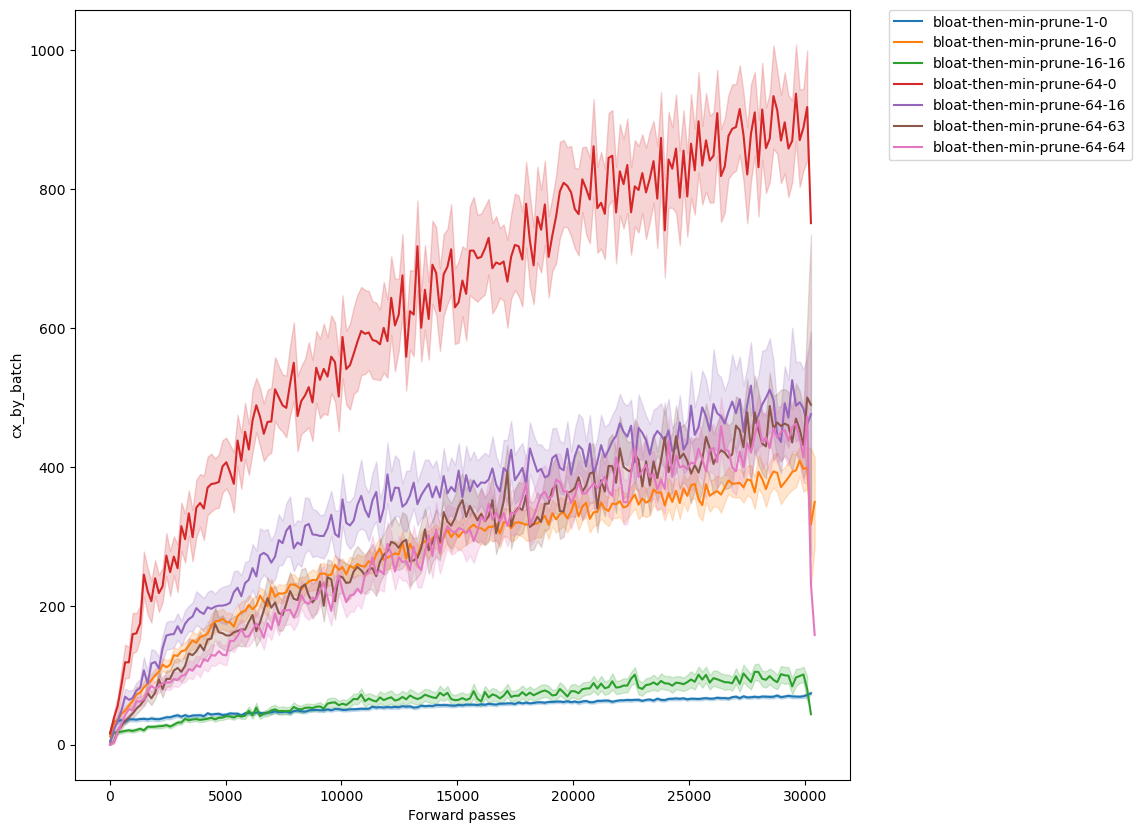

In [164]:
# plot_vs_evals(results, 'cx_by_batch', save_path, show)
plot_vs_evals(results, 'cx_by_batch', save_path, show, mean_by_target=True, smooth=0.8)

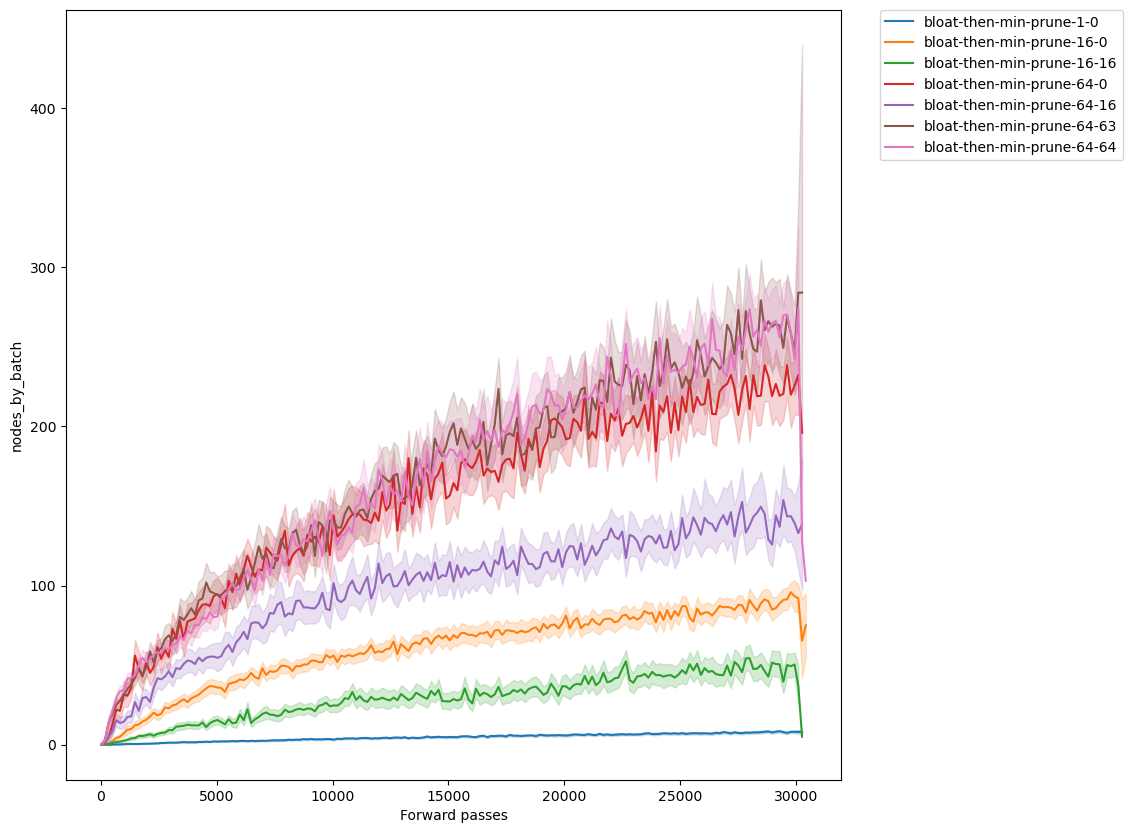

In [165]:
# plot_vs_evals(results, 'nodes_by_batch', save_path, show)
plot_vs_evals(results, 'nodes_by_batch', save_path, show, mean_by_target=True, smooth=0.8)

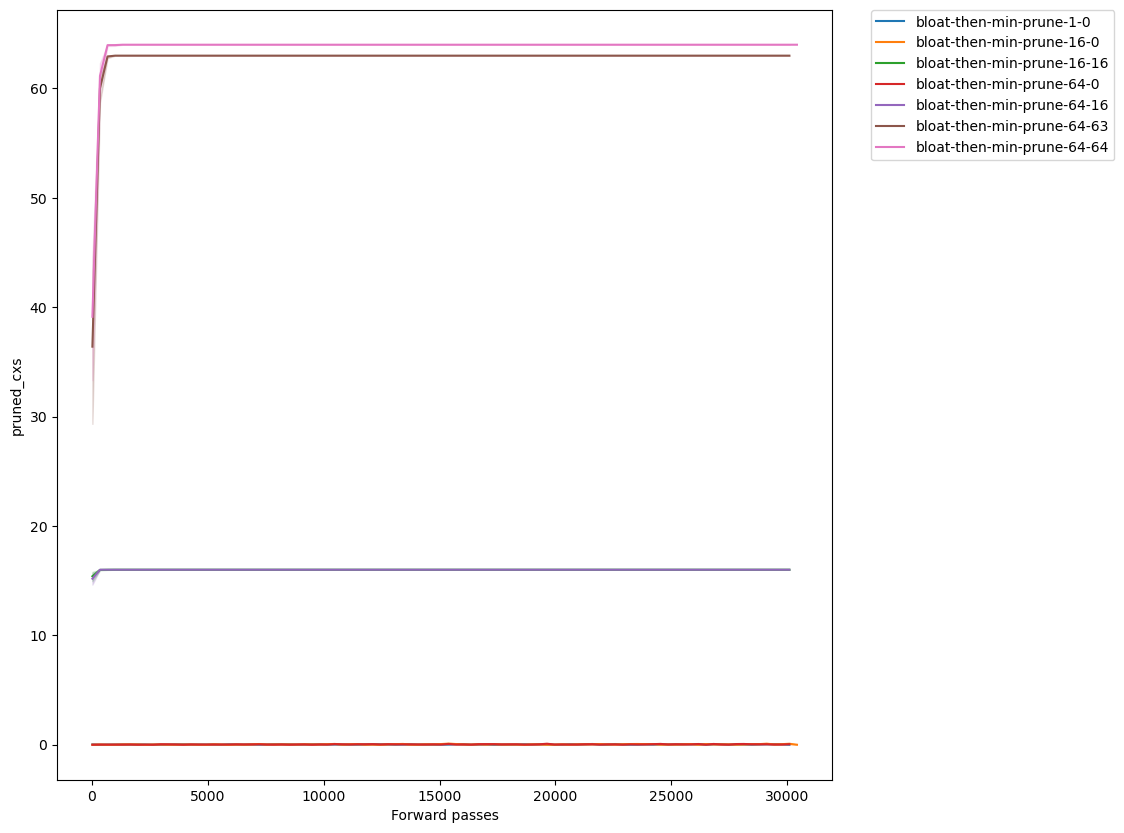

In [166]:
# plot_vs_evals(results, 'pruned_cxs', save_path, show)
plot_vs_evals(results, 'pruned_cxs', save_path, show, mean_by_target=True, smooth=0.90)